![tracker](https://us-central1-vertex-ai-mlops-369716.cloudfunctions.net/pixel-tracking?path=statmike%2Fvertex-ai-mlops%2FApplied+GenAI%2FGenerate&file=Tokens+-+Counting+And+Listing.ipynb)
<!--- header table --->
<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Generate/Tokens%20-%20Counting%20And%20Listing.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo">
      <br>Run in<br>Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https%3A%2F%2Fraw.githubusercontent.com%2Fstatmike%2Fvertex-ai-mlops%2Fmain%2FApplied%2520GenAI%2FGenerate%2FTokens%2520-%2520Counting%2520And%2520Listing.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo">
      <br>Run in<br>Colab Enterprise
    </a>
  </td>      
  <td style="text-align: center">
    <a href="https://github.com/statmike/vertex-ai-mlops/blob/main/Applied%20GenAI/Generate/Tokens%20-%20Counting%20And%20Listing.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      <br>View on<br>GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/statmike/vertex-ai-mlops/main/Applied%20GenAI/Generate/Tokens%20-%20Counting%20And%20Listing.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo">
      <br>Open in<br>Vertex AI Workbench
    </a>
  </td>
</table>

# Tokens - Counting And Listing
  
**Input/Output Sizes: Tokens**

Large language models have limits for the size of input then can receive and output they can return.  While we think of these as words, maybe even characters, the models are actually using a codified version of language where the coding process is called tokenization.  It is not as simple as a `unique_word = unique_token` because models use a data compression mechanism like [Byte-Pair Encoding (BPE)](https://en.wikipedia.org/wiki/Byte_pair_encoding).

>**Sidebar:**
>
> Languages are enormous.  Many words and many versions and variations of words.  Words are made up of characters and it turns out there are actually fewer groupings of unique characters than unique words.  Byte-Pair Encoding groups common/frequent sets of characters into unique encodings.  This process is a big part of mapping languages to machine learning and is a core part of the research.  Modern LLMs don't just take a "bag" of unique words, or encoded character groupings.  They also consider all the combinations of these with lengths that can be very long.  The longer the considered length the more the more semantic meaning and nuance can be learned from passages of text.  This motivates the need for the attention mechanism that has enable modern LLMs to become so useful.

Without getting into too much detail about the mechanics of the LLMs we want to know why these token limits exists.  First, computational performance.  Handling more means needing more memory and more computational complexity.  There are models designed for larger input and/or output.  These models have architectures designed to handle longer text during their training phase.  Models are typically priced based on the input+output size so we should try to focus the interaction with LLMs on the specific task with optimal information.

>**Sidebar:**
>
>Input and output limits for LLMs can be described in the analogy of interacting with a researcher as we have before in this document.  The LLM is the researcher.  We can bring new information to the researcher - context in the prompt.  The researcher may limit what they are willing to consider when we ask each question - input tokens.  The researcher may also limit the response they give - output tokens.

**Tokens and Pricing - Control and Transparency**

LLMs hosted as API's are typically priced by a combination of the input+output and the model itself.  Large general models might cost more while smaller topical models (think code completion) are cheaper.  Models with highly focused areas of knowledge might have very special pricing - think medical or legal with specific domains covered in the pre-training data.

One mechanism to control cost is limiting the input and output size.  To control output sizes models have parameters like `max_output_token`.  Input size can be controlled by creating smaller, more optimal chunks of input with techniques like retrieval augmented generation (RAG) - semantic retrieval.

With Vertex AI Generative AI [pricing](https://cloud.google.com/vertex-ai/generative-ai/pricing) for LLMs is based on the model and the character count of the input + output. This makes pricing easy and transparent.  .

**Multimodal**

Gemini models are natively multimodal and can take inputs of more than text, like audio, video, images, and documents.  These are coverted to tokens as well.

**Models and Token Limits**

Each model has its own specification for input and output size limits.  Check out the current details of [Google Models on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models).

**Workflow**

This notebook will cover multiple ways of getting token and character counts for inputs and outputs.  It will also show a how to get token representation of inputs for a deeper understanding of how text is processed.

- Local computation of token count: [List tokens](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/list-token#get_a_list_of_tokens_and_token_ids_for_a_prompt)
    - Includes getting a list of tokens with token IDs
- Remote computation of token count with the Count Tokens API: [Use The CountTokens API](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/get-token-count)
- Responses include Token Information:
    - [Get The Token Count For A Prompt](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/get-token-count#get_the_token_count_for_a_prompt)
    - [Gemini API Response Body: UsageMetadata](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/inference#response)

---
## Colab Setup

To run this notebook in Colab run the cells in this section.  Otherwise, skip this section.

This cell will authenticate to GCP (follow prompts in the popup).

In [23]:
PROJECT_ID = 'statmike-mlops-349915' # replace with project ID

In [24]:
try:
    from google.colab import auth
    auth.authenticate_user()
    !gcloud config set project {PROJECT_ID}
    print('Colab authorized to GCP')
except Exception:
    print('Not a Colab Environment')
    pass

Not a Colab Environment


---
## Installs

The list `packages` contains tuples of package import names and install names.  If the import name is not found then the install name is used to install quitely for the current user.

In [71]:
# tuples of (import name, install name, min_version)
packages = [
    ('google.cloud.aiplatform', 'google-cloud-aiplatform', '1.69.0'),
    ('numpy', 'numpy'),
    ('matplotlib', 'matplotlib')
]

import importlib
install = False
for package in packages:
    if not importlib.util.find_spec(package[0]):
        print(f'installing package {package[1]}')
        install = True
        !pip install {package[1]} -U -q --user
    elif len(package) == 3:
        if importlib.metadata.version(package[0]) < package[2]:
            print(f'updating package {package[1]}')
            install = True
            !pip install {package[1]} -U -q --user

### API Enablement

In [26]:
!gcloud services enable aiplatform.googleapis.com

### Restart Kernel (If Installs Occured)

After a kernel restart the code submission can start with the next cell after this one.

In [27]:
if install:
    import IPython
    app = IPython.Application.instance()
    app.kernel.do_shutdown(True)
    IPython.display.display(IPython.display.Markdown("""<div class=\"alert alert-block alert-warning\">
        <b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. The previous cells do not need to be run again⚠️</b>
        </div>"""))

---
## Setup

inputs:

In [28]:
project = !gcloud config get-value project
PROJECT_ID = project[0]
PROJECT_ID

'statmike-mlops-349915'

In [29]:
REGION = 'us-central1'
SERIES = 'applied-genai'
EXPERIMENT = 'tokens'

packages:

In [30]:
import io, base64

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown

from google.cloud import aiplatform
import vertexai.generative_models # for Gemini Models

In [31]:
aiplatform.__version__

'1.69.0'

clients:

In [32]:
vertexai.init(project = PROJECT_ID, location = REGION)

---
## Gemini Example

This section is a short example of setting up and generating responses with a Gemini model on Vertex AI.  Gemini is multimodal and can take text, audio, video, image, and document based inputs.

For more details on working with Gemini check out the companion workflow: [Vertex AI Gemini API](./Vertex%20AI%20Gemini%20API.ipynb)

**References:**
- [Gemini API Quickstart](https://cloud.google.com/vertex-ai/generative-ai/docs/start/quickstarts/quickstart-multimodal)
- [Vertex AI Gemini API](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/inference)
- [Gemini For Image Understanding](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/image-understanding)

### Setup Model

In [33]:
llm = vertexai.generative_models.GenerativeModel("gemini-1.5-flash-001")

### Generate Response: From Text Prompt

In [34]:
prompt_text = 'Describe the plot'

In [35]:
response = llm.generate_content([prompt_text])

In [36]:
Markdown(response.text)

Please provide me with the title of the story, movie, or book you'd like me to describe the plot of. I need some context to understand what you're referring to! 😊 


### Generate Response: From Multimodal Prompt

Make an image example, in this case a plot of a `sin` curve.  Notice that a title is not added - let's see how well the LLM can describe the plot without any hints!

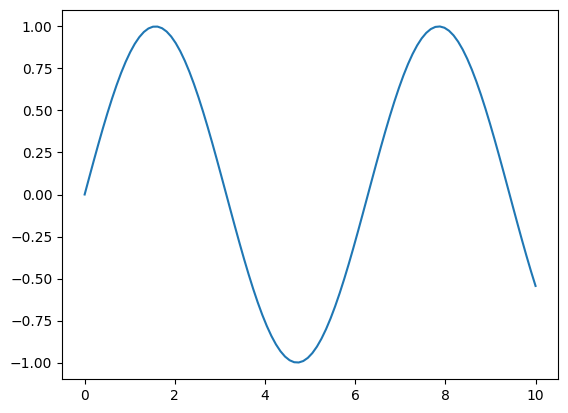

In [37]:
x = np.linspace(0, 10, 100)
y = np.sin(x)
plt.plot(x, y)

buffer = io.BytesIO()
plt.savefig(buffer, format = 'png')
plot_bytes = buffer.getvalue()

plt.show()

In [38]:
prompt_image = vertexai.generative_models.Part.from_data(data = plot_bytes, mime_type = 'image/png')

In [39]:
response = llm.generate_content([prompt_image, prompt_text])

In [40]:
Markdown(response.text)

The plot shows a sinusoidal wave. It starts at a value of 0, increases to a maximum of 1, then decreases to a minimum of -1 before increasing again to 0. The wave repeats this cycle, completing two full oscillations in the shown range.

---
## Local: Tokenizer In The SDK

The SDK has a direct method of counting and listing tokens.

**References:**
- [List tokens](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/list-token#get_a_list_of_tokens_and_token_ids_for_a_prompt)

In [49]:
from vertexai.preview.tokenization import get_tokenizer_for_model
tokenizer = get_tokenizer_for_model("gemini-1.5-flash")

In [53]:
tokenizer.count_tokens([prompt_text])

CountTokensResult(total_tokens=3)

In [58]:
tokens = tokenizer.compute_tokens([prompt_text])
tokens

PreviewComputeTokensResult(tokens_info=[TokensInfo(token_ids=[50721, 573, 10198], tokens=[b'Describe', b' the', b' plot'], role='user')])

In [59]:
tokens.tokens_info

[TokensInfo(token_ids=[50721, 573, 10198], tokens=[b'Describe', b' the', b' plot'], role='user')]

In [70]:
def token_info(prompt):
    tokens = tokenizer.compute_tokens([prompt_text]).tokens_info[0]
    response = f"**Prompt:** {prompt_text}\n\n**Tokenization:**\n\n|Token|Token ID|\n|---|---|\n"
    for i in range(len(tokens.token_ids)):
        response += f"|{tokens.tokens[i].decode('utf-8')}|{tokens.token_ids[i]}|\n"
    return response

Markdown(token_info(prompt_text))

**Prompt:** Describe the plot

**Tokenization:**

|Token|Token ID|
|---|---|
|Describe|50721|
| the|573|
| plot|10198|


---
## Remote: With The Model

The SDK include a direct API for counting tokens with the model being used to generate.  This includes:
- a character count for text
- token counts for multimodal content like the image used above

**Reference:**
- [Use The CountTokens API](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/get-token-count)
- [CountTokens API](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/count-tokens)

In [42]:
llm.count_tokens([prompt_text])

total_tokens: 3
total_billable_characters: 15

In [43]:
llm.count_tokens([prompt_image])

total_tokens: 258

In [44]:
llm.count_tokens([prompt_image, prompt_text])

total_tokens: 261
total_billable_characters: 15

---
## Responses: Token Count In Response From LLMs

The response from generation request includes `usageMetadata` like the number of tokens in the prompt, response and totals.

**References:**
- [Get The Token Count For A Prompt](https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/get-token-count#get_the_token_count_for_a_prompt)
- [Gemini API Response Body: UsageMetadata](https://cloud.google.com/vertex-ai/generative-ai/docs/model-reference/inference#response)

In [45]:
response = llm.generate_content([prompt_image, prompt_text])

In [46]:
response.text

'The plot shows a sinusoidal curve that starts at 0, rises to a maximum of 1, falls to a minimum of -1, and rises again to 0 at the end of the plot.'

In [47]:
response.usage_metadata

prompt_token_count: 261
candidates_token_count: 41
total_token_count: 302

The `candidates_token_count` is the token count of the response candidate from the LLM.  This can be verifies using the `count_tokens` API again, like the prior section:

In [48]:
llm.count_tokens(response.text)

total_tokens: 41
total_billable_characters: 115